<a href="https://colab.research.google.com/github/christophergaughan/ChristopherGaughan.io/blob/master/cars_regression_overfit_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/gdrive/My Drive/Colab Notebooks'

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Colab\ Notebooks

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('car_data_fixed_final.xlsx')

In [ ]:
df.head(40)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel-base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,hw_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [ ]:
df.applymap(lambda x: type(x).__name__)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel-base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,hw_mpg,price
0,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float
1,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float
2,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float
3,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float
4,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float
201,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float
202,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float
203,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float


In [ ]:
df["make"].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
alfa-romero       3
jaguar            3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64

In [ ]:
df["fuel_type"].value_counts()

gas       185
diesel     20
Name: fuel_type, dtype: int64

In [ ]:
df["price"].value_counts()

8495.0     2
18150.0    2
7295.0     2
6229.0     2
8845.0     2
          ..
15580.0    1
6377.0     1
30760.0    1
16925.0    1
18920.0    1
Name: price, Length: 186, dtype: int64

In [ ]:
df.describe()

,symboling,normalized_losses,wheel-base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,hw_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


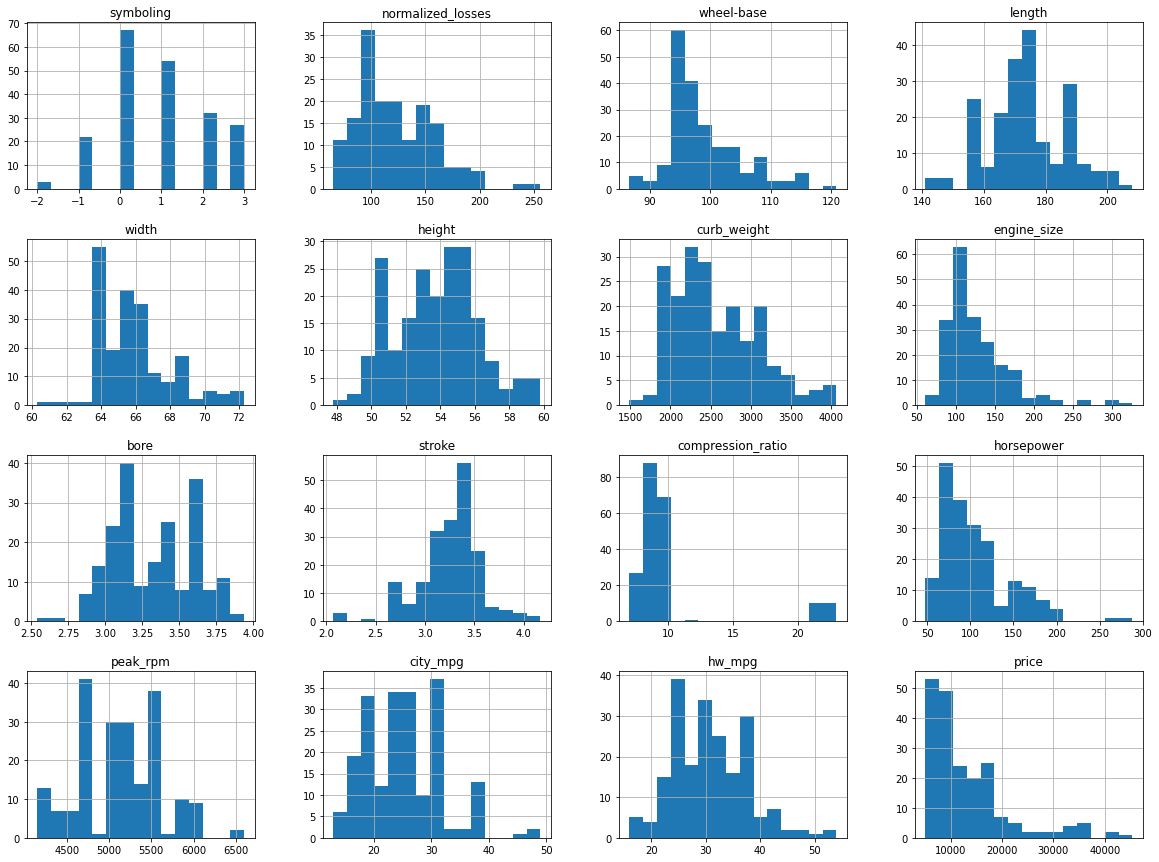

In [ ]:
%matplotlib inline   
import matplotlib.pyplot as plt
df.hist(bins=15, figsize=(20,15))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
median = df["price"].median()
df["price"].fillna(median, inplace=True)

In [ ]:
df['price'].value_counts()

10295.0    5
13499.0    2
6692.0     2
6229.0     2
8495.0     2
          ..
15580.0    1
6377.0     1
30760.0    1
16925.0    1
18920.0    1
Name: price, Length: 186, dtype: int64

In [ ]:
df["pricing_cat"] = pd.cut(df["price"],
                               bins=[0., 6000.1, 10000.1, 20000.1, 40000., np.inf], 
                               labels=[1, 2, 3, 4, 5])

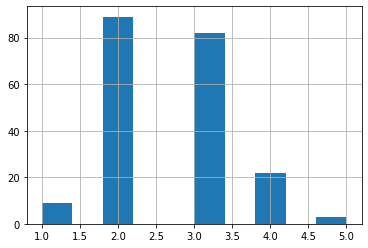

In [ ]:
df["pricing_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["pricing_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [ ]:
strat_test_set["pricing_cat"].value_counts() / len(strat_test_set)

2    0.439024
3    0.390244
4    0.097561
1    0.048780
5    0.024390
Name: pricing_cat, dtype: float64

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("pricing_cat", axis=1, inplace=True)

In [ ]:
housing = strat_train_set.copy()

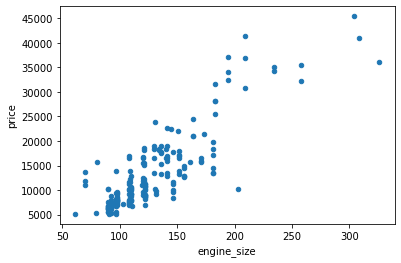

In [ ]:
df.plot(kind="scatter", x="engine_size", y="price")

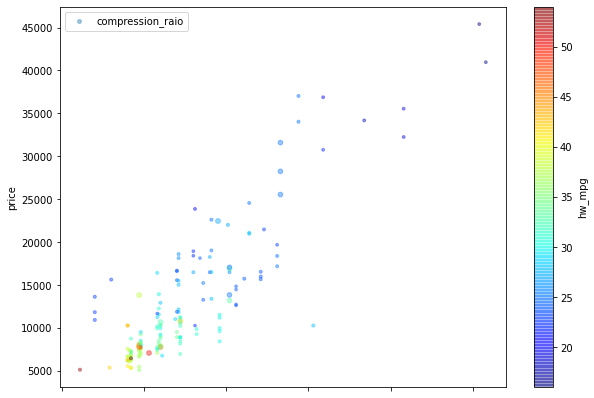

In [ ]:
housing.plot(kind="scatter", x="engine_size", y="price", alpha=0.4,
    s=housing["compression_ratio"], label="compression_raio", figsize=(10,7),
    c="hw_mpg", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
engine_size          0.860343
curb_weight          0.819817
horsepower           0.749844
width                0.724558
length               0.686567
wheel-base           0.584847
bore                 0.533139
normalized_losses    0.203254
height               0.140439
stroke               0.083716
compression_ratio    0.072890
symboling           -0.080149
peak_rpm            -0.106712
city_mpg            -0.668822
hw_mpg              -0.693037
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0758061240>,
      dtype=object)

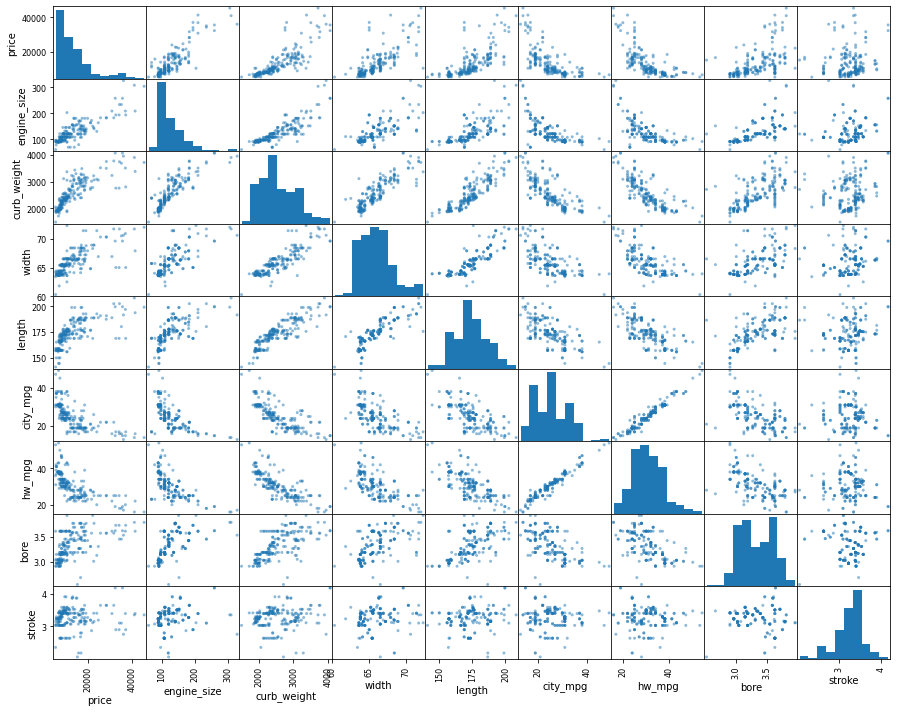

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["price", "engine_size", "curb_weight", "width", "length",
                                "city_mpg", "hw_mpg", "bore", "stroke"]

scatter_matrix(df[attributes], figsize=(15, 12))

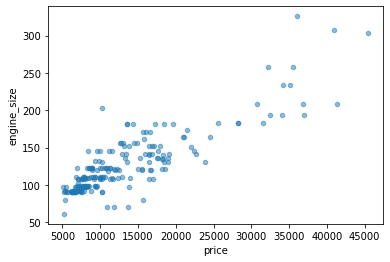

In [ ]:
df.plot(kind="scatter", x="price", y="engine_size", 
             alpha=0.5)

In [ ]:
df["city_hw_mpg_ratio"] = df["city_mpg"]/df["hw_mpg"]
df["curb_wt_engine_size_ratio"]= df["curb_weight"]/df["engine_size"]
df['engine_size_curb_wt_ratio'] = df['engine_size']/df['curb_weight']

In [ ]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                        1.000000
engine_size                  0.860343
curb_weight                  0.819817
horsepower                   0.749844
width                        0.724558
length                       0.686567
engine_size_curb_wt_ratio    0.587916
wheel-base                   0.584847
bore                         0.533139
normalized_losses            0.203254
height                       0.140439
stroke                       0.083716
compression_ratio            0.072890
symboling                   -0.080149
peak_rpm                    -0.106712
city_hw_mpg_ratio           -0.247039
curb_wt_engine_size_ratio   -0.431969
city_mpg                    -0.668822
hw_mpg                      -0.693037
Name: price, dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
price_point = df.drop(["normalized_losses", "make", "aspiration", "num_doors", "fuel_type", "body_style", "drive_wheels", "engine_location", "engine_type", "num_cylinders", "fuel_system"], axis=1)

In [ ]:
imputer.fit(price_point)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
df.applymap(lambda x: type(x).__name__)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel-base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,hw_mpg,price,pricing_cat,city_hw_mpg_ratio,curb_wt_engine_size_ratio,engine_size_curb_wt_ratio
0,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float,int,float,float,float
1,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float,int,float,float,float
2,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float,int,float,float,float
3,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float,int,float,float,float
4,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float,int,float,float,float
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float,int,float,float,float
201,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float,int,float,float,float
202,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float,int,float,float,float
203,int,float,str,str,str,str,str,str,str,float,float,float,float,int,str,str,int,str,float,float,float,float,float,int,int,float,int,float,float,float


In [ ]:
imputer.statistics_

array([1.00000000e+00, 9.70000000e+01, 1.73200000e+02, 6.55000000e+01,
       5.41000000e+01, 2.41400000e+03, 1.20000000e+02, 3.31000000e+00,
       3.29000000e+00, 9.00000000e+00, 9.50000000e+01, 5.20000000e+03,
       2.40000000e+01, 3.00000000e+01, 1.02950000e+04, 3.00000000e+00,
       8.12500000e-01, 2.08659794e+01, 4.79249012e-02])

In [ ]:
price_point.median().values

array([1.00000000e+00, 9.70000000e+01, 1.73200000e+02, 6.55000000e+01,
       5.41000000e+01, 2.41400000e+03, 1.20000000e+02, 3.31000000e+00,
       3.29000000e+00, 9.00000000e+00, 9.50000000e+01, 5.20000000e+03,
       2.40000000e+01, 3.00000000e+01, 1.02950000e+04, 8.12500000e-01,
       2.08659794e+01, 4.79249012e-02])

In [ ]:
X = imputer.transform(price_point)

In [ ]:
pricing_tr = pd.DataFrame(X, columns=price_point.columns,
                          index=price_point.index)

# Handling Text and Categorical Attributes

In [ ]:
pricing_cat = df[["make"]]
pricing_cat.head(10)

,make
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
5,audi
6,audi
7,audi
8,audi
9,audi


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
pricing_cat_encoded = ordinal_encoder.fit_transform(pricing_cat)
pricing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
ordinal_encoder.categories_

[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
        'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
pricing_cat_1hot = cat_encoder.fit_transform(pricing_cat)
pricing_cat_1hot

<205x22 sparse matrix of type '<class 'numpy.float64'>'
	with 205 stored elements in Compressed Sparse Row format>

In [ ]:
pricing_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
cat_encoder.categories_

[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
        'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)]

In [ ]:
col_names = "curb_weight", "engine_size", "city_mpg", "hw_mpg"
curb_weight_ix, engine_size_ix, city_mpg_ix, hw_mpg_ix = [
    df.columns.get_loc(c) for c in col_names] # get the column indices 
    

In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin


# curb_weight_ix, engine_size_ix, city_mpg_ix, hw_mpg_ix = 3, 4, 5, 6

# class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
#     def __init__(self, add_engine_size_curb_wt_ratio=True): # no *args or **kargs
#         self.add_engine_size_curb_wt_ratio = add_engine_size_curb_wt_ratio
#     def fit(self, X, y=None):
#         return self  # nothing else to do
#     def transform(self, X):
#         curb_wt_engine_size_ratio = X[:, curb_weight_ix] / X[:, engine_size_ix]
#         city_hw_mpg_ratio = X[:, city_mpg_ix] / X[:, hw_mpg_ix]
#         if self.add_engine_size_curb_wt_ratio:
#             engine_size_curb_wt_ratio = X[:, engine_size_ix] / X[:, curb_weight_ix]
#             return np.c_[X,engine_size_curb_wt_ratio , city_hw_mpg_ratio,
#                 curb_wt_engine_size_ratio]

#         else:
#             return np.c_[X, curb_wt_engine_size_ratio, city_hw_mpg_ratio,
#                          engine_size_curb_wt_ratio]

# attr_adder = CombinedAttributesAdder(add_engine_size_curb_wt_ratio=False)
# price_point_extra_attribs = attr_adder.transform(df.values)

TypeError: ignored

# How can we convert categorical columns into the numerical counterpart

In [ ]:
df.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel-base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,hw_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [ ]:
df = pd.read_excel('car_data_fixed_final.xlsx')

In [ ]:
# df.body_style = pd.Categorical(df.body_style) #covert columntype from x to y
# df["body_style"] = df.body_style.cat.codes # replace every value in column with their categorical codes
# df.head(10)
catregorical_columns = ["make", "fuel_type", "aspiration", "num_doors", "body_style", "drive_wheels", "engine_location", "engine_type", "num_cylinders", "fuel_system"]
for col in catregorical_columns:
    df[col] = pd.Categorical(df[col])
    df[col] = df[col].cat.codes
df.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel-base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,hw_mpg,price
0,3,NaN,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,1,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,1,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,1,1,0,2,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,1,1,0,1,3,1,0,105.8,192.7,71.4,55.7,2844,3,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,1,1,0,1,4,1,0,105.8,192.7,71.4,55.7,2954,3,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,1,1,1,1,3,1,0,105.8,192.7,71.4,55.9,3086,3,1,131,5,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,1,1,1,2,2,0,0,99.5,178.2,67.9,52.0,3053,3,1,131,5,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [ ]:
df= df.dropna()
df.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel-base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,hw_mpg,price
3,2,164.0,1,1,0,1,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,1,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,1,1,0,1,3,1,0,105.8,192.7,71.4,55.7,2844,3,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,1,1,1,1,3,1,0,105.8,192.7,71.4,55.9,3086,3,1,131,5,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,2,1,0,2,3,2,0,101.2,176.8,64.8,54.3,2395,3,2,108,5,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
11,0,192.0,2,1,0,1,3,2,0,101.2,176.8,64.8,54.3,2395,3,2,108,5,3.50,2.80,8.8,101.0,5800.0,23,29,16925.0
12,0,188.0,2,1,0,2,3,2,0,101.2,176.8,64.8,54.3,2710,3,3,164,5,3.31,3.19,9.0,121.0,4250.0,21,28,20970.0
13,0,188.0,2,1,0,1,3,2,0,101.2,176.8,64.8,54.3,2765,3,3,164,5,3.31,3.19,9.0,121.0,4250.0,21,28,21105.0
18,2,121.0,3,1,0,2,2,1,0,88.4,141.1,60.3,53.2,1488,2,4,61,1,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
19,1,98.0,3,1,0,2,2,1,0,94.5,155.9,63.6,52.0,1874,3,2,90,1,3.03,3.11,9.6,70.0,5400.0,38,43,6295.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalized_losses  160 non-null    float64
 2   make               160 non-null    int8   
 3   fuel_type          160 non-null    int8   
 4   aspiration         160 non-null    int8   
 5   num_doors          160 non-null    int8   
 6   body_style         160 non-null    int8   
 7   drive_wheels       160 non-null    int8   
 8   engine_location    160 non-null    int8   
 9   wheel-base         160 non-null    float64
 10  length             160 non-null    float64
 11  width              160 non-null    float64
 12  height             160 non-null    float64
 13  curb_weight        160 non-null    int64  
 14  engine_type        160 non-null    int8   
 15  num_cylinders      160 non-null    int8   
 16  engine_size        160 non

In [ ]:
from sklearn.preprocessing import Normalizer
data = df.to_numpy()
data

array([[ 2.0000e+00,  1.6400e+02,  1.0000e+00, ...,  3.0000e+01,
         1.3950e+04,  3.0000e+00],
       [ 2.0000e+00,  1.6400e+02,  1.0000e+00, ...,  2.2000e+01,
         1.7450e+04,  3.0000e+00],
       [ 1.0000e+00,  1.5800e+02,  1.0000e+00, ...,  2.5000e+01,
         1.7710e+04,  3.0000e+00],
       ...,
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  2.3000e+01,
         2.1485e+04,  3.0000e+00],
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  2.7000e+01,
         2.2470e+04,  3.0000e+00],
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  2.5000e+01,
         2.2625e+04,  3.0000e+00]])

In [ ]:
# Now we will normalize the above array
data = Normalizer().fit_transform(data)
data


array([[ 1.31757741e-04,  1.08041347e-02,  6.58788703e-05, ...,
         1.97636611e-03,  9.19010240e-01,  1.97636611e-04],
       [ 1.08015759e-04,  8.85729221e-03,  5.40078793e-05, ...,
         1.18817335e-03,  9.42437494e-01,  1.62023638e-04],
       [ 5.32929380e-05,  8.42028420e-03,  5.32929380e-05, ...,
         1.33232345e-03,  9.43817932e-01,  1.59878814e-04],
       ...,
       [-4.46748713e-05,  4.24411278e-03,  9.38172298e-04, ...,
         1.02752204e-03,  9.59839611e-01,  1.34024614e-04],
       [-4.30974795e-05,  4.09426055e-03,  9.05047069e-04, ...,
         1.16363195e-03,  9.68400363e-01,  1.29292438e-04],
       [-4.26197932e-05,  4.04888036e-03,  8.95015658e-04, ...,
         1.06549483e-03,  9.64272822e-01,  1.27859380e-04]])

In [ ]:
X, y = np.delete(data, -4, axis = 1), data[:,-4]
print(X.shape,y.shape)

(160, 26) (160,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .85)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(24, 26) (24,) (136, 26) (136,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("accuracy = {}".format(accuracy))

accuracy = 0.6537567884105903


(16, 26) (16,) (144, 26) (144,) 0.9 0.9054312145857011
(17, 26) (17,) (143, 26) (143,) 0.89 0.8860948247949052
(19, 26) (19,) (141, 26) (141,) 0.88 0.9707541174748897
(20, 26) (20,) (140, 26) (140,) 0.87 0.9214334842982969
(22, 26) (22,) (138, 26) (138,) 0.86 0.6624540023059214
(24, 26) (24,) (136, 26) (136,) 0.85 0.4354472854532089
(25, 26) (25,) (135, 26) (135,) 0.84 -29.55547812536829
(27, 26) (27,) (133, 26) (133,) 0.83 0.8877992454844327
(28, 26) (28,) (132, 26) (132,) 0.82 0.7240915253858935
(30, 26) (30,) (130, 26) (130,) 0.8099999999999999 0.9455984156482903
(32, 26) (32,) (128, 26) (128,) 0.7999999999999999 0.7302864048424127
(33, 26) (33,) (127, 26) (127,) 0.7899999999999999 0.9649763593713994
(35, 26) (35,) (125, 26) (125,) 0.7799999999999999 0.9643479658904279
(36, 26) (36,) (124, 26) (124,) 0.7699999999999999 0.9529788991601147
(38, 26) (38,) (122, 26) (122,) 0.7599999999999999 0.9742539862607612
(40, 26) (40,) (120, 26) (120,) 0.7499999999999999 0.9715743772007489
(41, 26

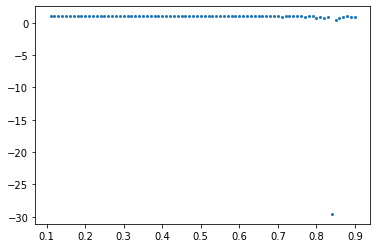

In [ ]:
test_sizes = []
accuracies = []
for test_size in np.arange(0.90, 0.10, -0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    test_sizes.append(test_size)
    model = LinearRegression()
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, test_size, accuracy)

plt.scatter(test_sizes, accuracies, s = 4.00)
